## Agri-Food Emissions Forecasting

#### Life cycle of Machine learning Project

- Understanding the Problem Statement
- Data Collection
- Data Checks to perform
- Exploratory data analysis
- Data Pre-Processing
- Model Training
- Choose best model

### 1. Problem statement
- The aim of the Agri-Food Emissions Forecasting project is to analyze and forecast agricultural CO2 emissions and their impact on climate change using FAO and IPCC data.

### 2. Data Collection
- Dataset was acquired from [kaggle](https://www.kaggle.com/datasets/alessandrolobello/agri-food-co2-emission-dataset-forecasting-ml).
- The data consists of 31 columns and 6965 rows.

#### 2.1 Import Data and Required Packages
#####  Importing Pandas, Numpy, Matplotlib, Seaborn and Warings Library.

In [1]:
import re
import json
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import pickle
from features_selection import *
from sklearn.preprocessing import OrdinalEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from ipywidgets import interact, widgets
from IPython.display import display, Markdown
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

##### Import the CSV Data as Pandas DataFrame

In [2]:
df = pd.read_csv('data/data.csv')

##### Show Top 5 Records

In [3]:
df.head()

,Area,Year,Savanna fires,Forest fires,Crop Residues,Rice Cultivation,Drained organic soils (CO2),Pesticides Manufacturing,Food Transport,Forestland,...,Manure Management,Fires in organic soils,Fires in humid tropical forests,On-farm energy use,Rural population,Urban population,Total Population - Male,Total Population - Female,total_emission,Average Temperature °C
0,Afghanistan,1990,14.7237,0.0557,205.6077,686.00,0.0,11.807483,63.1152,-2388.803,...,319.1763,0.0,0.0,NaN,9655167.0,2593947.0,5348387.0,5346409.0,2198.963539,0.536167
1,Afghanistan,1991,14.7237,0.0557,209.4971,678.16,0.0,11.712073,61.2125,-2388.803,...,342.3079,0.0,0.0,NaN,10230490.0,2763167.0,5372959.0,5372208.0,2323.876629,0.020667
2,Afghanistan,1992,14.7237,0.0557,196.5341,686.00,0.0,11.712073,53.3170,-2388.803,...,349.1224,0.0,0.0,NaN,10995568.0,2985663.0,6028494.0,6028939.0,2356.304229,-0.259583
3,Afghanistan,1993,14.7237,0.0557,230.8175,686.00,0.0,11.712073,54.3617,-2388.803,...,352.2947,0.0,0.0,NaN,11858090.0,3237009.0,7003641.0,7000119.0,2368.470529,0.101917
4,Afghanistan,1994,14.7237,0.0557,242.0494,705.60,0.0,11.712073,53.9874,-2388.803,...,367.6784,0.0,0.0,NaN,12690115.0,3482604.0,7733458.0,7722096.0,2500.768729,0.372250


##### Renaming columns for ease

In [4]:
df = df.rename(columns={'Average Temperature °C':'average_temperature'})

In [5]:
df.head()

,Area,Year,Savanna fires,Forest fires,Crop Residues,Rice Cultivation,Drained organic soils (CO2),Pesticides Manufacturing,Food Transport,Forestland,...,Manure Management,Fires in organic soils,Fires in humid tropical forests,On-farm energy use,Rural population,Urban population,Total Population - Male,Total Population - Female,total_emission,average_temperature
0,Afghanistan,1990,14.7237,0.0557,205.6077,686.00,0.0,11.807483,63.1152,-2388.803,...,319.1763,0.0,0.0,NaN,9655167.0,2593947.0,5348387.0,5346409.0,2198.963539,0.536167
1,Afghanistan,1991,14.7237,0.0557,209.4971,678.16,0.0,11.712073,61.2125,-2388.803,...,342.3079,0.0,0.0,NaN,10230490.0,2763167.0,5372959.0,5372208.0,2323.876629,0.020667
2,Afghanistan,1992,14.7237,0.0557,196.5341,686.00,0.0,11.712073,53.3170,-2388.803,...,349.1224,0.0,0.0,NaN,10995568.0,2985663.0,6028494.0,6028939.0,2356.304229,-0.259583
3,Afghanistan,1993,14.7237,0.0557,230.8175,686.00,0.0,11.712073,54.3617,-2388.803,...,352.2947,0.0,0.0,NaN,11858090.0,3237009.0,7003641.0,7000119.0,2368.470529,0.101917
4,Afghanistan,1994,14.7237,0.0557,242.0494,705.60,0.0,11.712073,53.9874,-2388.803,...,367.6784,0.0,0.0,NaN,12690115.0,3482604.0,7733458.0,7722096.0,2500.768729,0.372250


##### Shape of the dataset

In [6]:
df.shape

(6965, 31)

#### 2.2 Dataset information

The agricultural CO2 emission dataset has been constructed by merging and reprocessing approximately a dozen individual datasets from the Food and Agriculture Organization (FAO) and data from IPCC. These datasets were, cleaned, preprocessed and merged together to create a comprehensive and cohesive dataset for analysis and forecasting purposes.

#### Dataset Features:
- **Savanna fires:** Emissions from fires in savanna ecosystems.
- **Forest fires:** Emissions from fires in forested areas.
- **Crop Residues:** Emissions from burning or decomposing leftover plant material after crop harvesting.
- **Rice Cultivation:** Emissions from methane released during rice cultivation.
- **Drained organic soils (CO2):** Emissions from carbon dioxide released when draining organic soils.
- **Pesticides Manufacturing:** Emissions from the production of pesticides.
- **Food Transport:** Emissions from transporting food products.
- **Forestland:** Land covered by forests.
- **Net Forest conversion:** Change in forest area due to deforestation and afforestation.
- **Food Household Consumption:** Emissions from food consumption at the household level.
- **Food Retail:** Emissions from the operation of retail establishments selling food.
- **On-farm Electricity Use:** Electricity consumption on farms.
- **Food Packaging:** Emissions from the production and disposal of food packaging materials.
- **Agrifood Systems Waste Disposal:** Emissions from waste disposal in the agrifood system.
- **Food Processing:** Emissions from processing food products.
- **Fertilizers Manufacturing:** Emissions from the production of fertilizers.
- **IPPU:** Emissions from industrial processes and product use.
- **Manure applied to Soils:** Emissions from applying animal manure to agricultural soils.
- **Manure left on Pasture:** Emissions from animal manure on pasture or grazing land.
- **Manure Management:** Emissions from managing and treating animal manure.
- **Fires in organic soils:** Emissions from fires in organic soils.
- **Fires in humid tropical forests:** Emissions from fires in humid tropical forests.
- **On-farm energy use:** Energy consumption on farms.
- **Rural population:** Number of people living in rural areas.
- **Urban population:** Number of people living in urban areas.
- **Total Population - Male:** Total number of male individuals in the population.
- **Total Population - Female:** Total number of female individuals in the population.
- **total_emission:** Total greenhouse gas emissions from various sources.
- **Average Temperature °C:** The average increasing of temperature (by year) in degrees Celsius

### 3. Data Checks to perform

- Check Missing values
- Check Duplicates
- Check data type
- Check the number of unique values of each column
- Check statistics of data set
- Check various categories present in the different categorical column

#### 3.1 Check Missing values

In [7]:
df.isna().sum()

Area                                  0
Year                                  0
Savanna fires                        31
Forest fires                         93
Crop Residues                      1389
Rice Cultivation                      0
Drained organic soils (CO2)           0
Pesticides Manufacturing              0
Food Transport                        0
Forestland                          493
Net Forest conversion               493
Food Household Consumption          473
Food Retail                           0
On-farm Electricity Use               0
Food Packaging                        0
Agrifood Systems Waste Disposal       0
Food Processing                       0
Fertilizers Manufacturing             0
IPPU                                743
Manure applied to Soils             928
Manure left on Pasture                0
Manure Management                   928
Fires in organic soils                0
Fires in humid tropical forests     155
On-farm energy use                  956


``As so many features has so many null values, so taking taking assumptions about these set of features may negatively impact the performance. Also, after dropping these values we still have huge training examples with non-null values. So, let just drop all null values rather than exchanging them with mean, median, etc., based on assumptions``

In [8]:
df = df.dropna()

In [9]:
df.reset_index(drop=True,inplace=True)

In [10]:
df.shape

(4546, 31)

#### 3.2 Check Duplicates

In [11]:
print(df.duplicated().sum())

0


``There are no duplicates values in the data set``

#### 3.3 Check data types

In [12]:
# Check Null and Dtypes
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4546 entries, 0 to 4545
Data columns (total 31 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Area                             4546 non-null   object 
 1   Year                             4546 non-null   int64  
 2   Savanna fires                    4546 non-null   float64
 3   Forest fires                     4546 non-null   float64
 4   Crop Residues                    4546 non-null   float64
 5   Rice Cultivation                 4546 non-null   float64
 6   Drained organic soils (CO2)      4546 non-null   float64
 7   Pesticides Manufacturing         4546 non-null   float64
 8   Food Transport                   4546 non-null   float64
 9   Forestland                       4546 non-null   float64
 10  Net Forest conversion            4546 non-null   float64
 11  Food Household Consumption       4546 non-null   float64
 12  Food Retail         

#### 3.4 Checking the number of unique values of each column

In [13]:
df.nunique()

Area                                156
Year                                 31
Savanna fires                      3178
Forest fires                       2633
Crop Residues                      4478
Rice Cultivation                   3079
Drained organic soils (CO2)        1988
Pesticides Manufacturing           1200
Food Transport                     4477
Forestland                          463
Net Forest conversion               357
Food Household Consumption         4516
Food Retail                        4542
On-farm Electricity Use            4113
Food Packaging                     3103
Agrifood Systems Waste Disposal    4521
Food Processing                    3007
Fertilizers Manufacturing          2505
IPPU                               4501
Manure applied to Soils            4537
Manure left on Pasture             4539
Manure Management                  4533
Fires in organic soils              125
Fires in humid tropical forests    1497
On-farm energy use                 4221


#### 3.5 Check statistics of data set

In [14]:
df.describe()

,Year,Savanna fires,Forest fires,Crop Residues,Rice Cultivation,Drained organic soils (CO2),Pesticides Manufacturing,Food Transport,Forestland,Net Forest conversion,...,Manure Management,Fires in organic soils,Fires in humid tropical forests,On-farm energy use,Rural population,Urban population,Total Population - Male,Total Population - Female,total_emission,average_temperature
count,4546.000000,4546.000000,4546.000000,4546.000000,4546.000000,4546.000000,4546.000000,4546.000000,4546.000000,4.546000e+03,...,4546.000000,4546.000000,4546.000000,4546.000000,4.546000e+03,4.546000e+03,4.546000e+03,4.546000e+03,4.546000e+03,4546.000000
mean,2005.298724,1578.318742,1154.424220,1202.174505,5601.932066,5274.474704,490.486595,2706.917010,-25260.695489,2.096907e+04,...,2938.618438,1854.341985,778.154170,3949.355305,2.635997e+07,2.483675e+07,2.579152e+07,2.538586e+07,8.787338e+04,0.912381
std,8.859797,6188.105460,3788.977297,4069.987071,21612.516836,19388.814454,1747.779191,6754.799901,96669.741412,1.145262e+05,...,9089.688421,28040.218491,3111.316439,14403.156282,1.091657e+08,8.018695e+07,9.302138e+07,8.863806e+07,2.759863e+05,0.580555
min,1990.000000,0.000000,0.000000,0.004500,0.000000,0.000000,0.000000,1.054300,-797183.079000,0.000000e+00,...,0.570700,0.000000,0.000000,0.031900,2.050600e+04,2.307800e+04,3.405900e+04,3.402500e+04,-3.918841e+05,-1.302417
25%,1998.000000,0.334500,0.048400,23.357000,90.361875,0.000000,8.000000,98.830450,-7498.135150,0.000000e+00,...,101.040225,0.000000,0.000000,43.269850,9.617765e+05,1.533926e+06,1.580942e+06,1.638107e+06,6.147423e+03,0.526979
50%,2005.000000,11.354550,7.592600,132.518200,268.512150,149.762750,34.000000,411.583700,-424.181900,4.548745e+02,...,445.150650,0.000000,0.000000,362.908800,3.552274e+06,4.496411e+06,4.673897e+06,4.776540e+06,1.792552e+04,0.875167
75%,2013.000000,329.383700,222.426075,513.156025,1344.480125,2864.212500,189.750000,1654.717400,0.000000,7.459780e+03,...,1699.477000,0.000000,65.823275,1733.715400,1.175335e+07,1.490217e+07,1.452794e+07,1.464379e+07,7.299027e+04,1.262063
max,2020.000000,114616.401100,52227.630600,33490.074100,164915.255600,241025.069600,16459.000000,67945.765000,171121.076000,1.605106e+06,...,70592.646500,991717.543100,51771.256800,248879.176900,9.000991e+08,9.020778e+08,7.435866e+08,7.133419e+08,3.115114e+06,3.558083


In [15]:
def show_stats(area):
    display(Markdown(f"``Descriptive statistics for {area}:``"))
    display(df[df['Area'] == area].describe())
    
area_dropdown = widgets.Dropdown(
    options=df['Area'].unique(),
    description='Select Area:',
    style={'description_width': 'initial'},
    layout={'width': 'max-content'}
)

interact(show_stats, area=area_dropdown)

interactive(children=(Dropdown(description='Select Area:', layout=Layout(width='max-content'), options=('Alban…

<function __main__.show_stats(area)>

 ``We can see that statistics are very Area Specific, as the distribution is quite appropriate when taking Area into account. So, even to check for outliers we have to move with respect to Area``

#### 3.6 Check various categories present in the different categorical column

In [16]:
df.head()

,Area,Year,Savanna fires,Forest fires,Crop Residues,Rice Cultivation,Drained organic soils (CO2),Pesticides Manufacturing,Food Transport,Forestland,...,Manure Management,Fires in organic soils,Fires in humid tropical forests,On-farm energy use,Rural population,Urban population,Total Population - Male,Total Population - Female,total_emission,average_temperature
0,Albania,1990,5.5561,7.0253,59.2391,23.5200,110.5705,2.0,46.9645,72.8581,...,474.6951,0.0,0.0,320.8805,2086075.0,1195379.0,1676902.0,1618163.0,3475.291240,0.735750
1,Albania,1991,5.5561,7.0253,31.4625,6.2720,110.5705,2.0,47.9519,72.8581,...,469.1415,0.0,0.0,195.1879,2073348.0,1202083.0,1675168.0,1626914.0,5680.135772,-0.461500
2,Albania,1992,5.5561,7.0253,29.9373,1.8816,110.5705,2.0,40.5272,72.8581,...,453.2180,0.0,0.0,163.1332,2033508.0,1207079.0,1670550.0,1633189.0,5221.131572,0.318250
3,Albania,1993,5.5561,7.0253,44.0550,1.0976,110.5705,2.0,57.6592,72.8581,...,481.3836,0.0,0.0,126.8489,1983942.0,1205641.0,1663515.0,1637195.0,5316.973272,0.270500
4,Albania,1994,5.5561,7.0253,42.4253,0.0000,110.5705,3.0,72.4242,72.8581,...,620.2991,0.0,0.0,94.9545,1936056.0,1204539.0,1654796.0,1639203.0,5564.287672,1.202667


In [17]:
print("Categories in 'Area' variable:     ",end=" " )
print(df['Area'].unique())

Categories in 'Area' variable:      ['Albania' 'Algeria' 'Angola' 'Argentina' 'Armenia' 'Australia' 'Austria'
 'Azerbaijan' 'Bahamas' 'Bangladesh' 'Barbados' 'Belarus' 'Belgium'
 'Belize' 'Benin' 'Bhutan' 'Bolivia (Plurinational State of)'
 'Bosnia and Herzegovina' 'Botswana' 'Brazil' 'Brunei Darussalam'
 'Bulgaria' 'Burundi' 'Cabo Verde' 'Cambodia' 'Canada'
 'Central African Republic' 'Chad' 'Chile' 'China' 'China, mainland'
 'Colombia' 'Comoros' 'Congo' 'Costa Rica' 'Croatia' 'Cuba' 'Cyprus'
 'Czechia' 'Czechoslovakia' "Democratic People's Republic of Korea"
 'Denmark' 'Djibouti' 'Dominica' 'Dominican Republic' 'Ecuador' 'Egypt'
 'El Salvador' 'Eritrea' 'Estonia' 'Eswatini' 'Ethiopia' 'Ethiopia PDR'
 'Finland' 'France' 'Gabon' 'Georgia' 'Germany' 'Ghana' 'Greece' 'Grenada'
 'Guatemala' 'Guinea' 'Guinea-Bissau' 'Guyana' 'Haiti' 'Honduras'
 'Hungary' 'Iceland' 'India' 'Indonesia' 'Iran (Islamic Republic of)'
 'Ireland' 'Israel' 'Italy' 'Jamaica' 'Japan' 'Jordan' 'Kazakhstan'
 'Kenya' '

In [18]:
# define numerical & categorical columns
numeric_features = [feature for feature in df.columns if df[feature].dtype != 'O']
categorical_features = [feature for feature in df.columns if df[feature].dtype == 'O']

# print columns
print('We have {} numerical features : {}'.format(len(numeric_features), numeric_features))
print('\nWe have {} categorical features : {}'.format(len(categorical_features), categorical_features))

We have 30 numerical features : ['Year', 'Savanna fires', 'Forest fires', 'Crop Residues', 'Rice Cultivation', 'Drained organic soils (CO2)', 'Pesticides Manufacturing', 'Food Transport', 'Forestland', 'Net Forest conversion', 'Food Household Consumption', 'Food Retail', 'On-farm Electricity Use', 'Food Packaging', 'Agrifood Systems Waste Disposal', 'Food Processing', 'Fertilizers Manufacturing', 'IPPU', 'Manure applied to Soils', 'Manure left on Pasture', 'Manure Management', 'Fires in organic soils', 'Fires in humid tropical forests', 'On-farm energy use', 'Rural population', 'Urban population', 'Total Population - Male', 'Total Population - Female', 'total_emission', 'average_temperature']

We have 1 categorical features : ['Area']


### 4. Exploring Data ( Visualization )

#### 4.1 Visualize Total_Emission and Average Temperature Distribution
- Histogram
- Kernel Distribution Function (KDE)

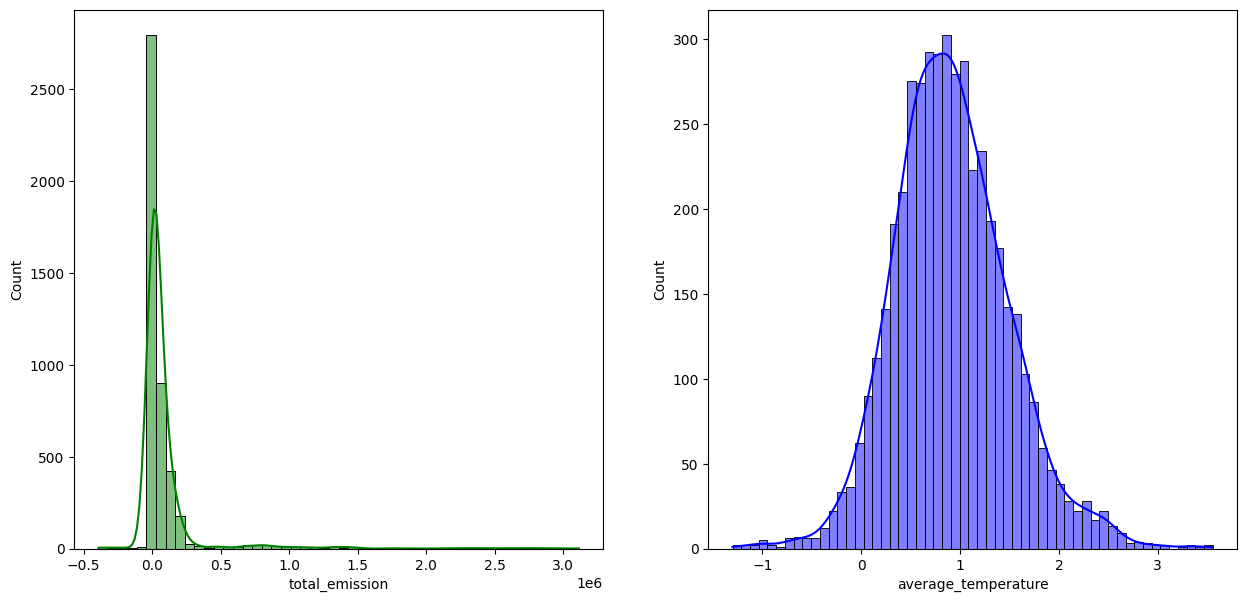

In [19]:
fig, axs = plt.subplots(1, 2, figsize=(15, 7))
plt.subplot(121)
sns.histplot(data=df,x='total_emission',bins=50,kde=True,color='g')
plt.subplot(122)
sns.histplot(data=df,x='average_temperature',kde=True,color='b')
plt.show()

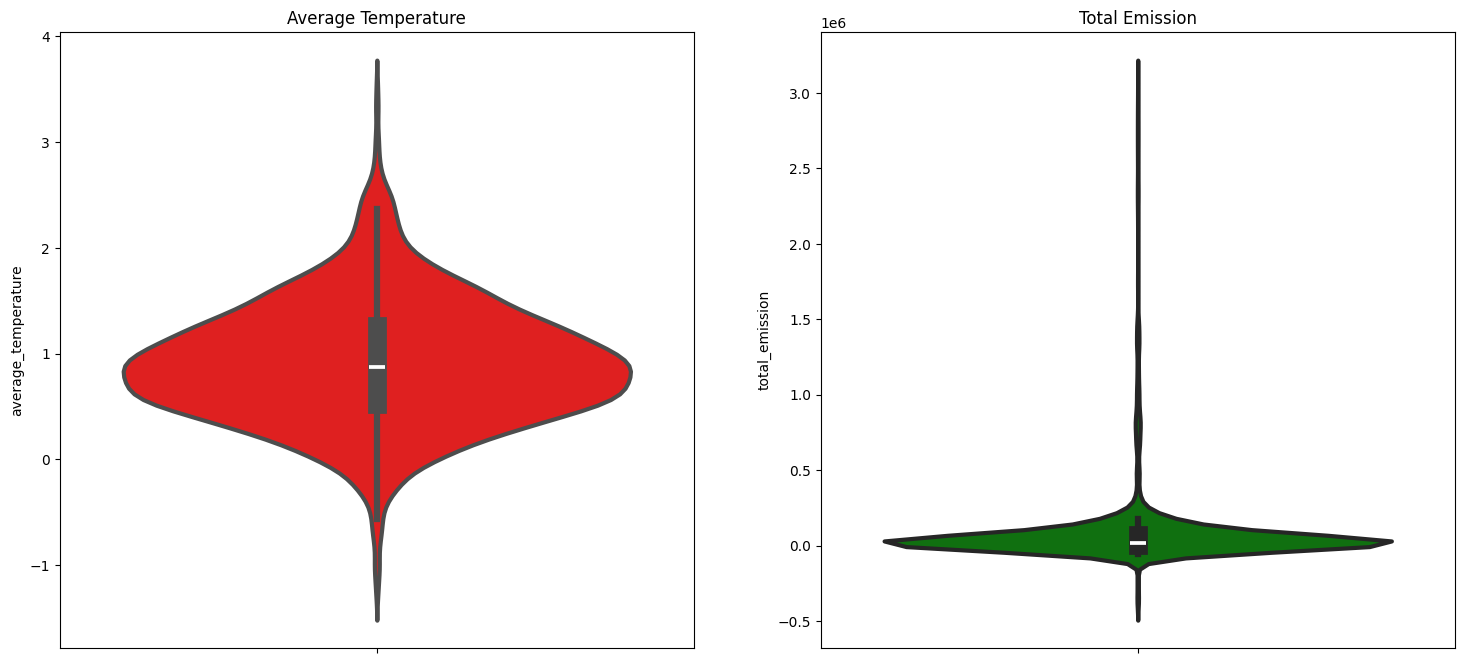

In [20]:
plt.figure(figsize=(18,8))
plt.subplot(121)
plt.title('Average Temperature')
sns.violinplot(y='average_temperature',data=df,color='red',linewidth=3)
plt.subplot(122)
plt.title('Total Emission')
sns.violinplot(y='total_emission',data=df,color='green',linewidth=3)
plt.show()

#### 4.2 Total Global Emission and Average Global Temperature Trends over time

Text(0.5, 1.0, 'Global Warming')

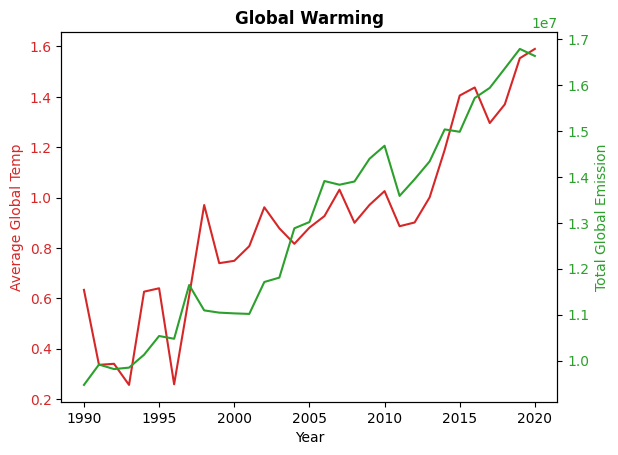

In [21]:
df_year = df.groupby('Year')
avg_temp = df_year.average_temperature.mean()
total_global_emission = df_year.total_emission.sum()
x = avg_temp.index

fig, ax1 = plt.subplots()

color = 'tab:red'
ax1.set_xlabel('Year')
ax1.set_ylabel('Average Global Temp', color = color)
ax1.plot(x, avg_temp, color = color)
ax1.tick_params(axis ='y', labelcolor = color)

# Adding Twin Axes to plot global emissions to the right
ax2 = ax1.twinx()
color = 'tab:green'
ax2.set_ylabel('Total Global Emission', color = color)
ax2.plot(x, total_global_emission, color = color)
ax2.tick_params(axis ='y', labelcolor = color)
plt.title('Global Warming', fontweight ="bold")

#### 4.3 Feature Wise Visualization

#### 4.3.1 POPULATION TRENDS OVER TIME 

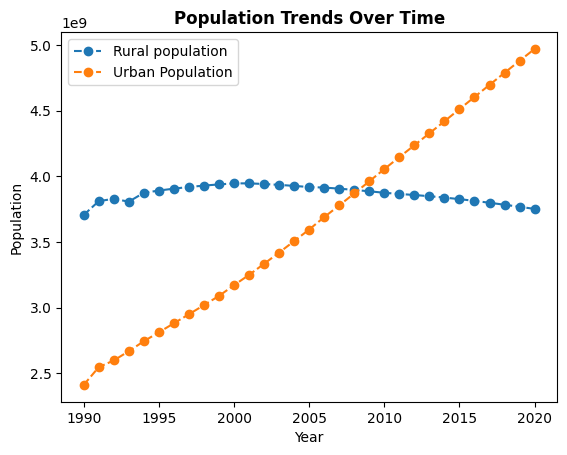

In [22]:
df_year = df.groupby('Year')
df_pop = df_year[['Rural population', 'Urban population']].sum()
df_pop.plot(marker='o', linestyle='dashed')
plt.xlabel('Year')
plt.ylabel('Population')
plt.title('Population Trends Over Time',fontweight="bold")
plt.legend(['Rural population', 'Urban Population'])
plt.show()

#### 4.3.2 VARIOUS EMISSIONS TRENDS OVER TIME 

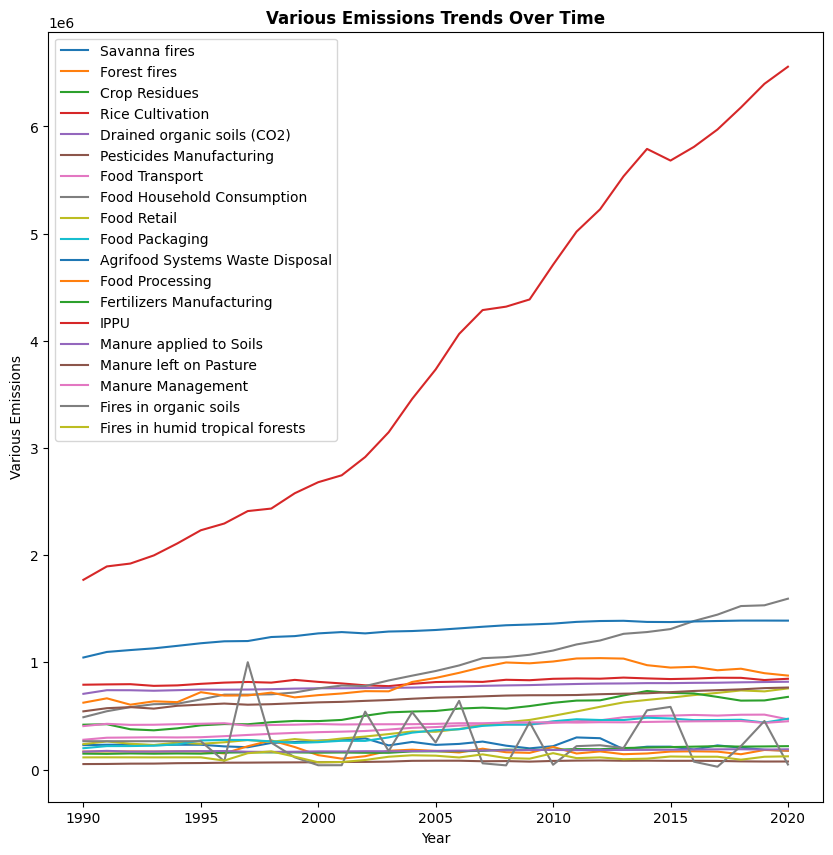

In [23]:
plt.figure(figsize=(10,10))
df_year = df.groupby('Year')
df_pop = df_year[['Savanna fires', 
                  'Forest fires', 
                  'Crop Residues',
                  'Rice Cultivation', 
                  'Drained organic soils (CO2)',
                  'Pesticides Manufacturing', 
                  'Food Transport', 
                  'Food Household Consumption', 
                  'Food Retail', 
                  'Food Packaging',
                  'Agrifood Systems Waste Disposal', 
                  'Food Processing',
                  'Fertilizers Manufacturing', 
                  'IPPU', 
                  'Manure applied to Soils',
                  'Manure left on Pasture', 
                  'Manure Management', 
                  'Fires in organic soils',
                  'Fires in humid tropical forests']].sum()
ax = plt.gca()
df_pop.plot(ax=ax)
plt.xlabel('Year')
plt.ylabel('Various Emissions')
plt.title('Various Emissions Trends Over Time',fontweight="bold")
plt.legend()
plt.show()

#### 4.3.3 FEATURES DISTRIBUTION

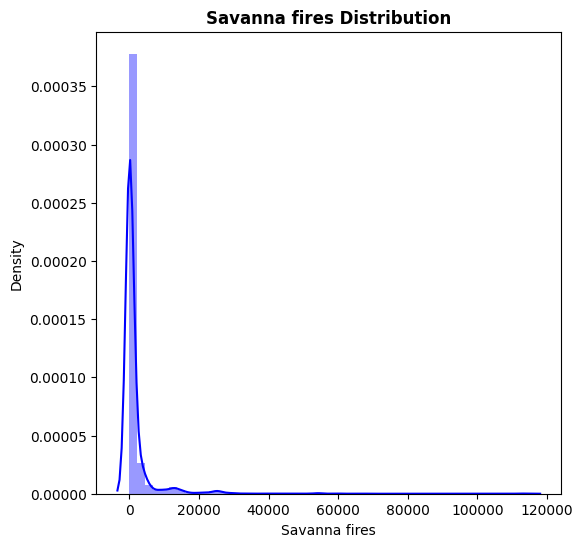

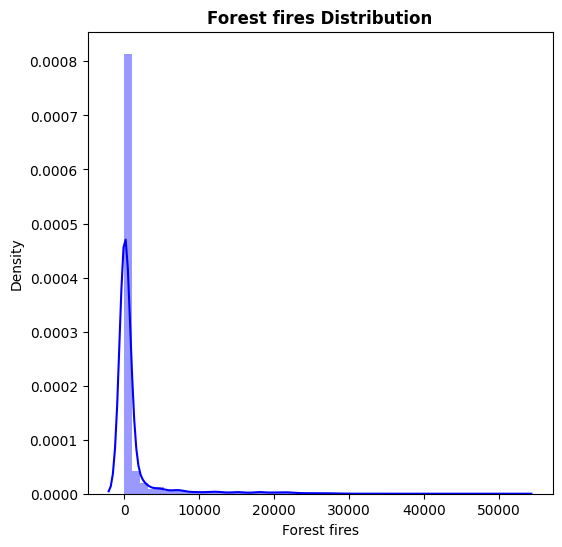

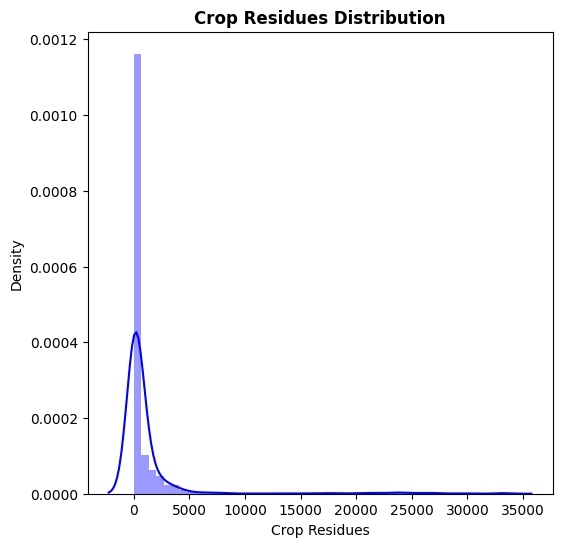

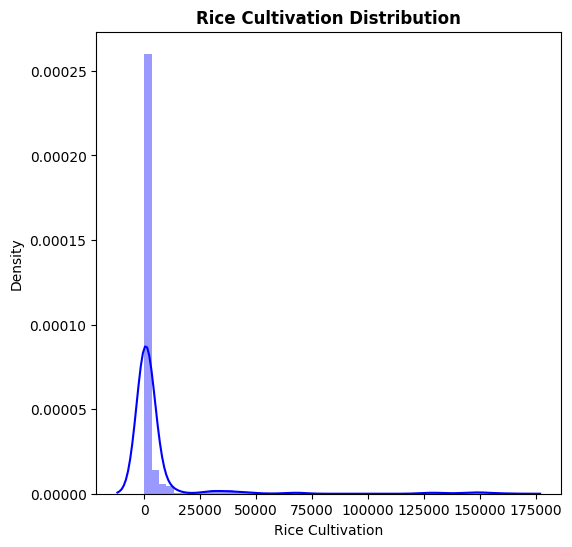

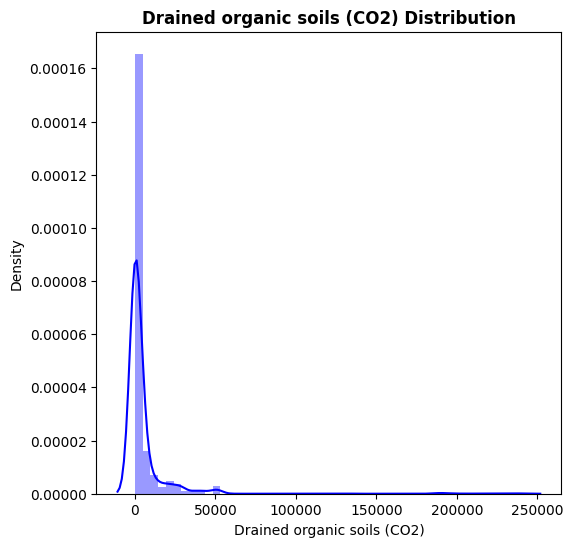

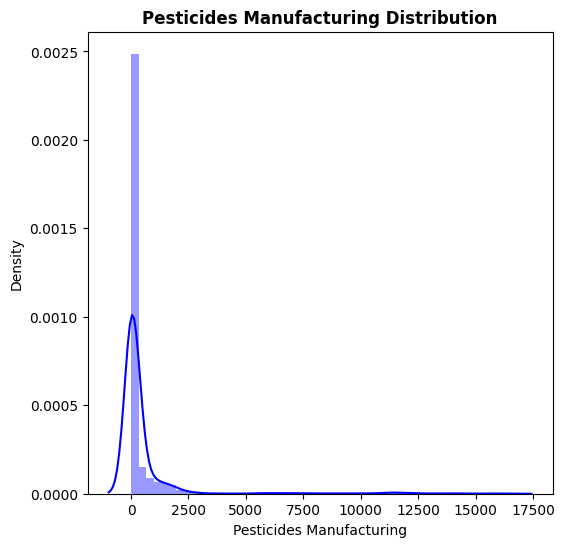

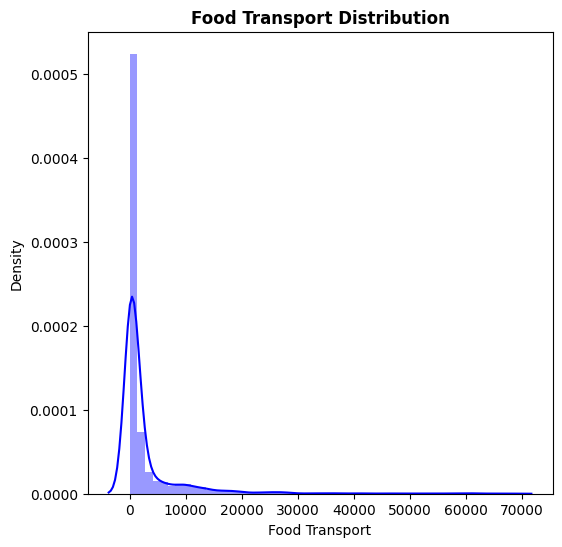

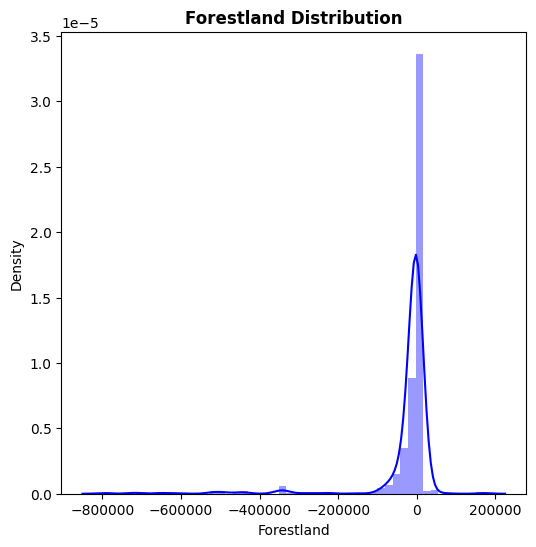

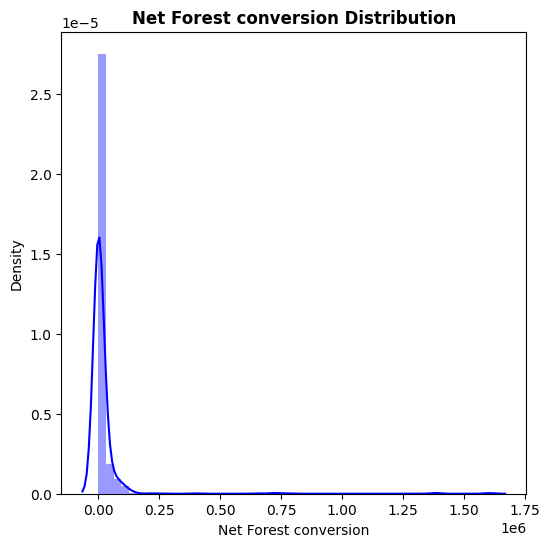

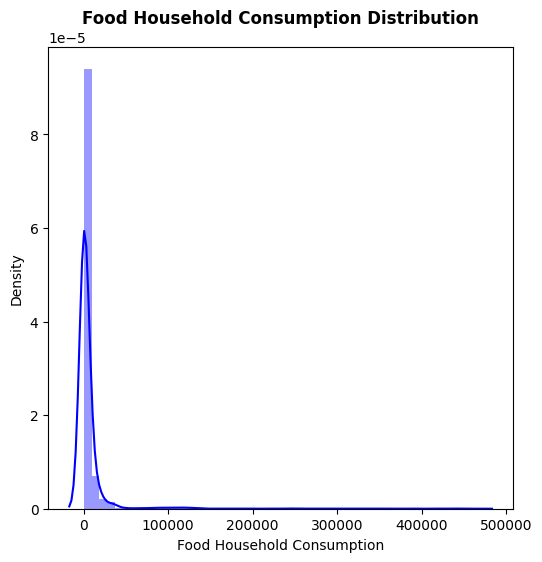

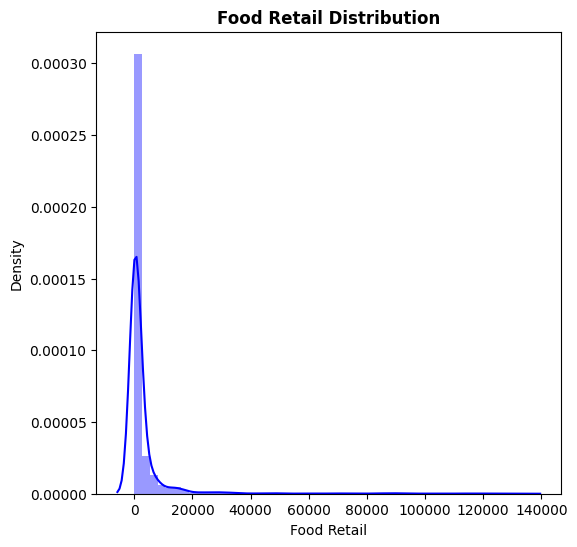

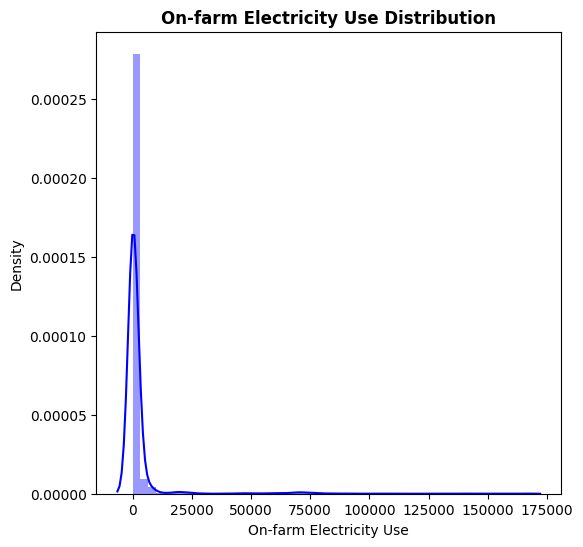

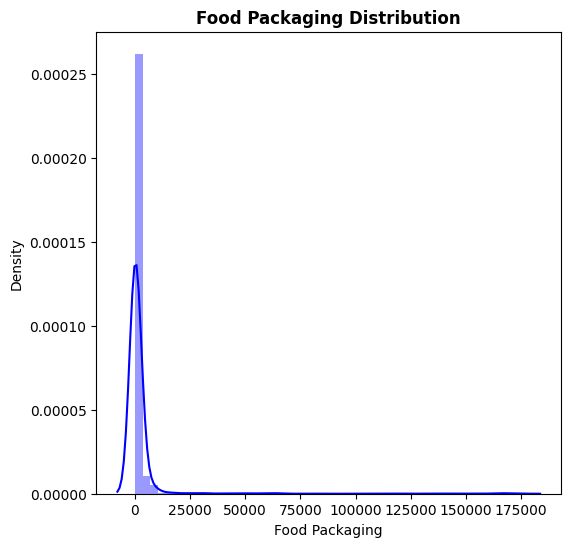

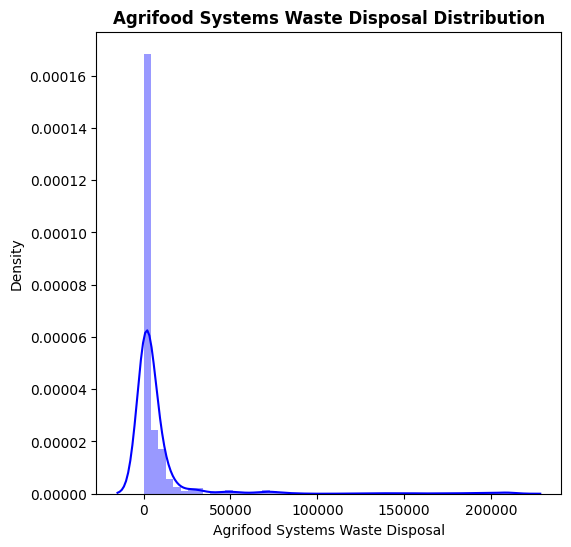

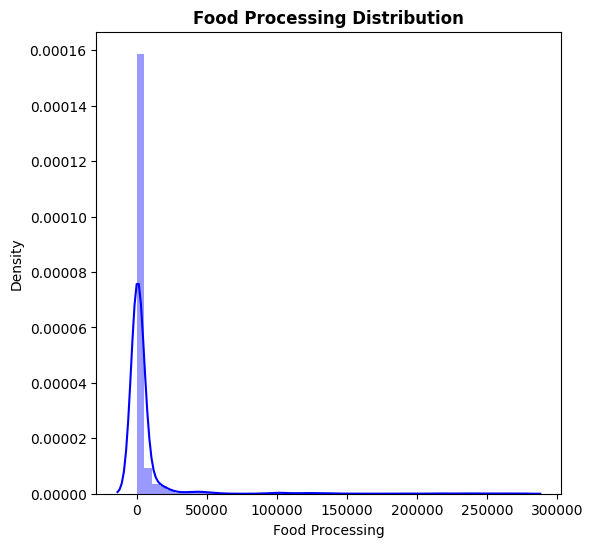

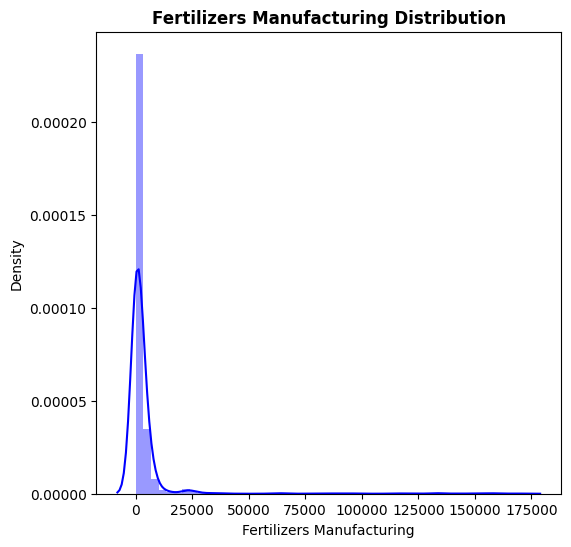

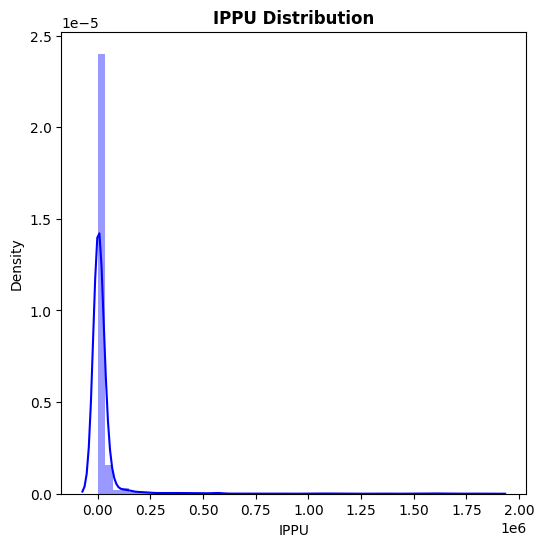

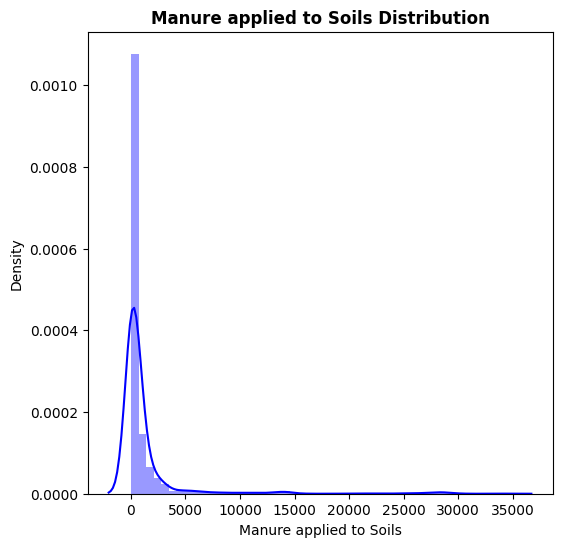

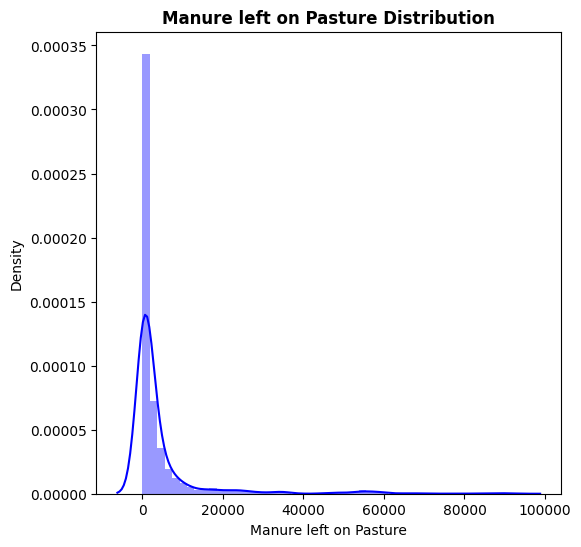

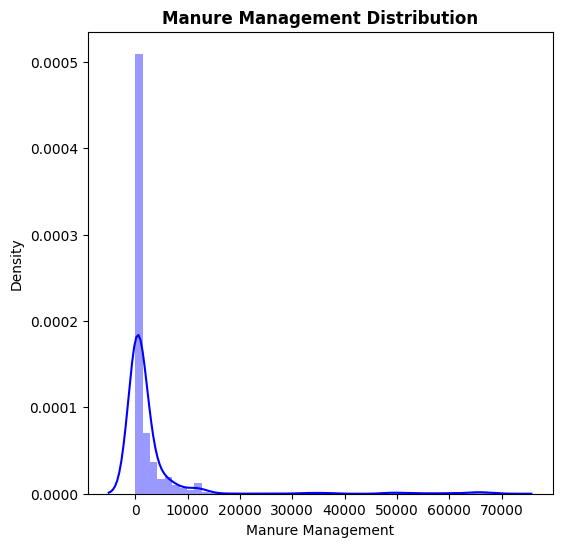

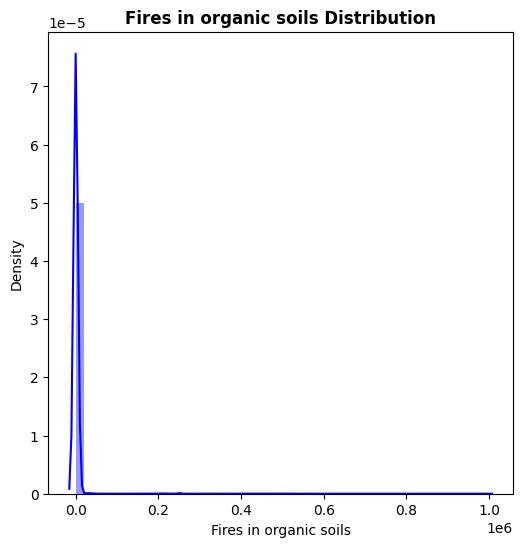

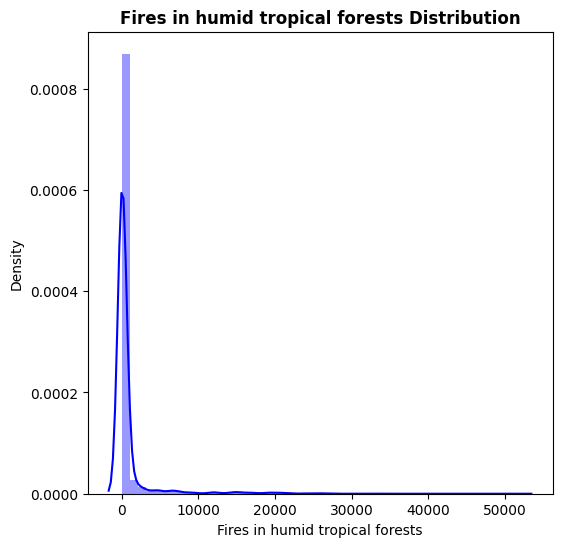

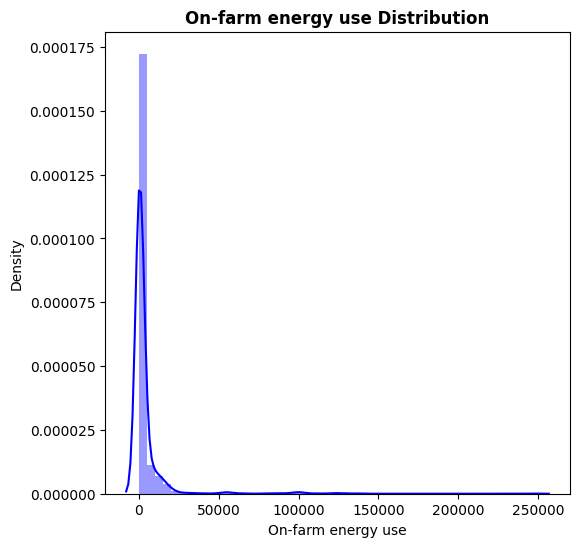

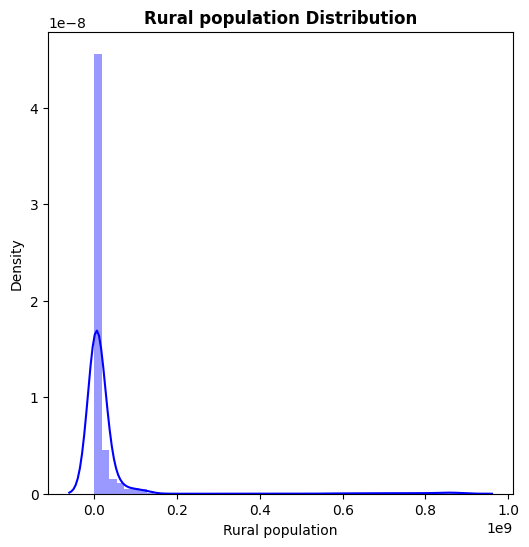

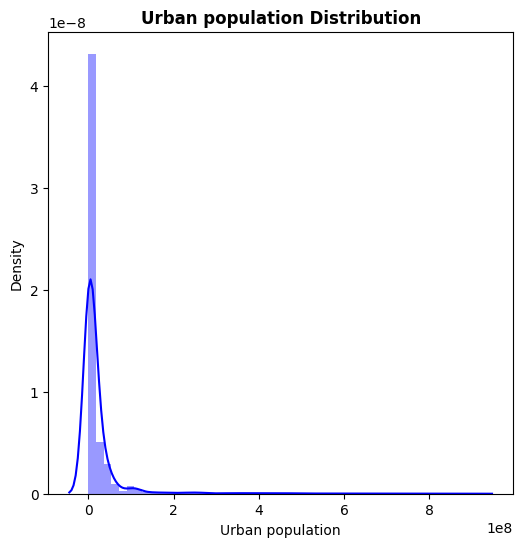

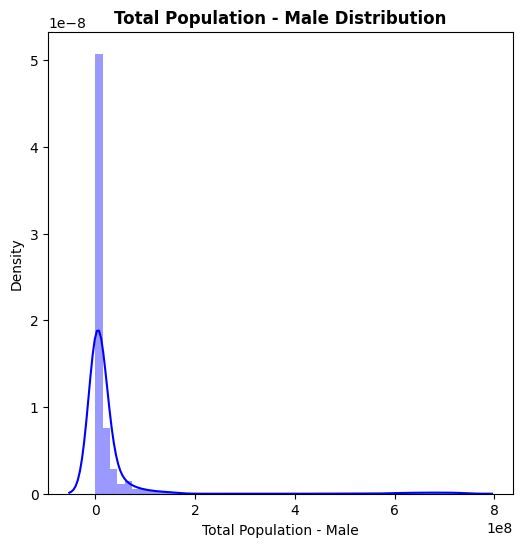

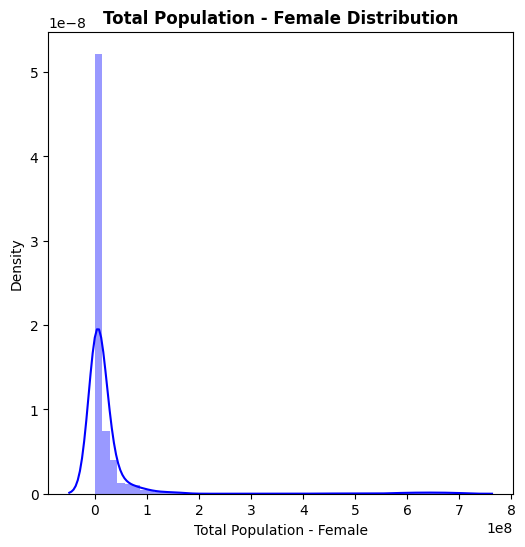

In [24]:
for feature in df.columns[2:-2]:
    plt.figure(figsize = (6,6))
    sns.distplot(df[feature],color = 'blue')
    plt.title(f"{feature} Distribution",fontweight='bold')
    plt.show()

#### 4.3.4 CHECKING OUTLIERS

In [25]:
sns.set_style("whitegrid")
sns.set_context("notebook", font_scale=1.5)

features = df.columns.tolist()[2:-2] 

def plot_boxplots(area):
    display(Markdown(f"**Outliers Stats for {area}:**"))
    
    fig, axes = plt.subplots(nrows=3, ncols=9, figsize=(30, 20))
    axes = axes.flatten()
    
    for i, feature in enumerate(features):
        sns.boxplot(data=df[df['Area'] == area], y=feature, ax=axes[i])
        axes[i].set_title(feature)
    
    for j in range(i + 1, len(axes)):
        fig.delaxes(axes[j])
    
    plt.tight_layout()
    plt.show()

area_dropdown = widgets.Dropdown(
    options=df['Area'].unique(),
    description='Select Area:',
    style={'description_width': 'initial'},
    layout={'width': 'max-content'}
)

interact(plot_boxplots, area=area_dropdown)

interactive(children=(Dropdown(description='Select Area:', layout=Layout(width='max-content'), options=('Alban…

<function __main__.plot_boxplots(area)>

``As we have noticed there are few outliers existing in each specific area features, so let just remove them.``

### 5. Outlier Removal

In [26]:
def outlier_removal(data):
    
    """
    This specific function basically remove outliers from each features based on specific area. 
    First of all, it filter the data of one area and find outliers and remove them and then concatenate that data to final data,
    then it repeats these steps again and again for every area.
    """
    
    print("Available features:", data.columns.tolist())
    print(" ")
    categorical_features = data.select_dtypes(include="object").columns.tolist()
    user_input = input("Enter feature names (separated by comma): ").strip()
    print(" ")
    features = [re.sub(r'[^a-zA-Z0-9_]', '', f.strip()) for f in user_input.split(",")]
    final_data = pd.DataFrame(columns=data.columns.tolist())
    
    for area in data['Area'].unique():
        area_data = data[data['Area'] == area]
        for feature in features:
            if (feature not in area_data.columns) or (feature in categorical_features):
                continue
            try: 
                Q1 = area_data[feature].quantile(0.25)
                Q3 = area_data[feature].quantile(0.75)
                IQR = Q3 - Q1
                upper_limit = Q3 + 1.5 * IQR
                lower_limit = Q1 - 1.5 * IQR
                area_data = area_data[(area_data[feature] >= lower_limit) & (area_data[feature] <= upper_limit)]
            except Exception as e:
                print(f"Error processing feature '{feature}' in area '{area}': {e}")
        print(f"{area}: {data[data['Area'] == area].shape[0] - area_data.shape[0]} rows dropped")
        final_data = pd.concat([final_data, area_data], axis=0)
    
    print("***************************************************")
    print(f'Total: {data.shape[0] - final_data.shape[0]} rows dropped.')
    final_data.reset_index(drop=True, inplace=True)
    return final_data

In [27]:
df.shape

(4546, 31)

In [28]:
filtered_df = outlier_removal(df)

Available features: ['Area', 'Year', 'Savanna fires', 'Forest fires', 'Crop Residues', 'Rice Cultivation', 'Drained organic soils (CO2)', 'Pesticides Manufacturing', 'Food Transport', 'Forestland', 'Net Forest conversion', 'Food Household Consumption', 'Food Retail', 'On-farm Electricity Use', 'Food Packaging', 'Agrifood Systems Waste Disposal', 'Food Processing', 'Fertilizers Manufacturing', 'IPPU', 'Manure applied to Soils', 'Manure left on Pasture', 'Manure Management', 'Fires in organic soils', 'Fires in humid tropical forests', 'On-farm energy use', 'Rural population', 'Urban population', 'Total Population - Male', 'Total Population - Female', 'total_emission', 'average_temperature']
 
Enter feature names (separated by comma): 'Savanna fires', 'Forest fires', 'Crop Residues', 'Rice Cultivation', 'Drained organic soils (CO2)', 'Pesticides Manufacturing', 'Food Transport', 'Forestland', 'Net Forest conversion', 'Food Household Consumption', 'Food Retail', 'On-farm Electricity Use', 

In [29]:
filtered_df.shape

(4227, 31)

### 6. Splitting Data to Features and Target (for further preprocessing)

In [30]:
X = filtered_df.drop(['average_temperature','total_emission'],axis=1)

In [31]:
y = filtered_df.total_emission

In [32]:
X.shape

(4227, 29)

In [33]:
y.shape

(4227,)

### 7. Label_Encoding and Normalization

In [34]:
X.head()

,Area,Year,Savanna fires,Forest fires,Crop Residues,Rice Cultivation,Drained organic soils (CO2),Pesticides Manufacturing,Food Transport,Forestland,...,Manure applied to Soils,Manure left on Pasture,Manure Management,Fires in organic soils,Fires in humid tropical forests,On-farm energy use,Rural population,Urban population,Total Population - Male,Total Population - Female
0,Albania,1990,5.5561,7.0253,59.2391,23.5200,110.5705,2.0,46.9645,72.8581,...,196.6440,383.3071,474.6951,0.0,0.0,320.8805,2086075.0,1195379.0,1676902.0,1618163.0
1,Albania,1991,5.5561,7.0253,31.4625,6.2720,110.5705,2.0,47.9519,72.8581,...,194.1851,394.0694,469.1415,0.0,0.0,195.1879,2073348.0,1202083.0,1675168.0,1626914.0
2,Albania,1992,5.5561,7.0253,29.9373,1.8816,110.5705,2.0,40.5272,72.8581,...,187.3747,400.0541,453.2180,0.0,0.0,163.1332,2033508.0,1207079.0,1670550.0,1633189.0
3,Albania,1993,5.5561,7.0253,44.0550,1.0976,110.5705,2.0,57.6592,72.8581,...,198.8094,426.4171,481.3836,0.0,0.0,126.8489,1983942.0,1205641.0,1663515.0,1637195.0
4,Albania,1994,5.5561,7.0253,42.4253,0.0000,110.5705,3.0,72.4242,72.8581,...,260.3013,546.0098,620.2991,0.0,0.0,94.9545,1936056.0,1204539.0,1654796.0,1639203.0


In [35]:
X.shape

(4227, 29)

In [36]:
num_features = X.select_dtypes(exclude="object").columns
cat_features = X.select_dtypes(include="object").columns

numeric_transformer = StandardScaler()
oh_transformer = OrdinalEncoder()

preprocessor = ColumnTransformer(
    [
        ("LabelEncoder", oh_transformer, cat_features),
         ("StandardScaler", numeric_transformer, num_features),        
    ]
)

In [37]:
P = preprocessor.fit_transform(X)

In [38]:
P.shape

(4227, 29)

In [39]:
X = pd.DataFrame(data=P,columns = X.columns)

In [40]:
X.head()

,Area,Year,Savanna fires,Forest fires,Crop Residues,Rice Cultivation,Drained organic soils (CO2),Pesticides Manufacturing,Food Transport,Forestland,...,Manure applied to Soils,Manure left on Pasture,Manure Management,Fires in organic soils,Fires in humid tropical forests,On-farm energy use,Rural population,Urban population,Total Population - Male,Total Population - Female
0,0.0,0.0,-0.254797,-0.306622,-0.285925,-0.260913,-0.266287,-0.282670,-0.396609,0.265576,...,-0.279588,-0.377470,-0.277782,-0.067985,-0.251936,-0.255666,-0.226930,-0.298854,-0.263833,-0.272589
1,0.0,1.0,-0.254797,-0.306622,-0.292522,-0.261686,-0.266287,-0.282670,-0.396467,0.265576,...,-0.280236,-0.376526,-0.278374,-0.067985,-0.251936,-0.264102,-0.227042,-0.298773,-0.263851,-0.272494
2,0.0,2.0,-0.254797,-0.306622,-0.292884,-0.261882,-0.266287,-0.282670,-0.397534,0.265576,...,-0.282028,-0.376001,-0.280068,-0.067985,-0.251936,-0.266254,-0.227395,-0.298713,-0.263899,-0.272426
3,0.0,3.0,-0.254797,-0.306622,-0.289531,-0.261917,-0.266287,-0.282670,-0.395072,0.265576,...,-0.279018,-0.373688,-0.277071,-0.067985,-0.251936,-0.268689,-0.227833,-0.298730,-0.263972,-0.272382
4,0.0,4.0,-0.254797,-0.306622,-0.289918,-0.261967,-0.266287,-0.282116,-0.392951,0.265576,...,-0.262831,-0.363198,-0.262286,-0.067985,-0.251936,-0.270830,-0.228257,-0.298743,-0.264062,-0.272360


In [41]:
# saving preprocessor model
with open('preprocessor.p', 'wb') as file:
    pickle.dump(preprocessor, file)

### 8. Features Selection

- Now, we can do some features selection on numeric features based on constant feature check, feature with high correlation with each other check, feature with low correlation with output check.

In [42]:
fs = Features_Selection(X,y,figsize=(40,40))

#### 8.1 Features Correlational Matrix

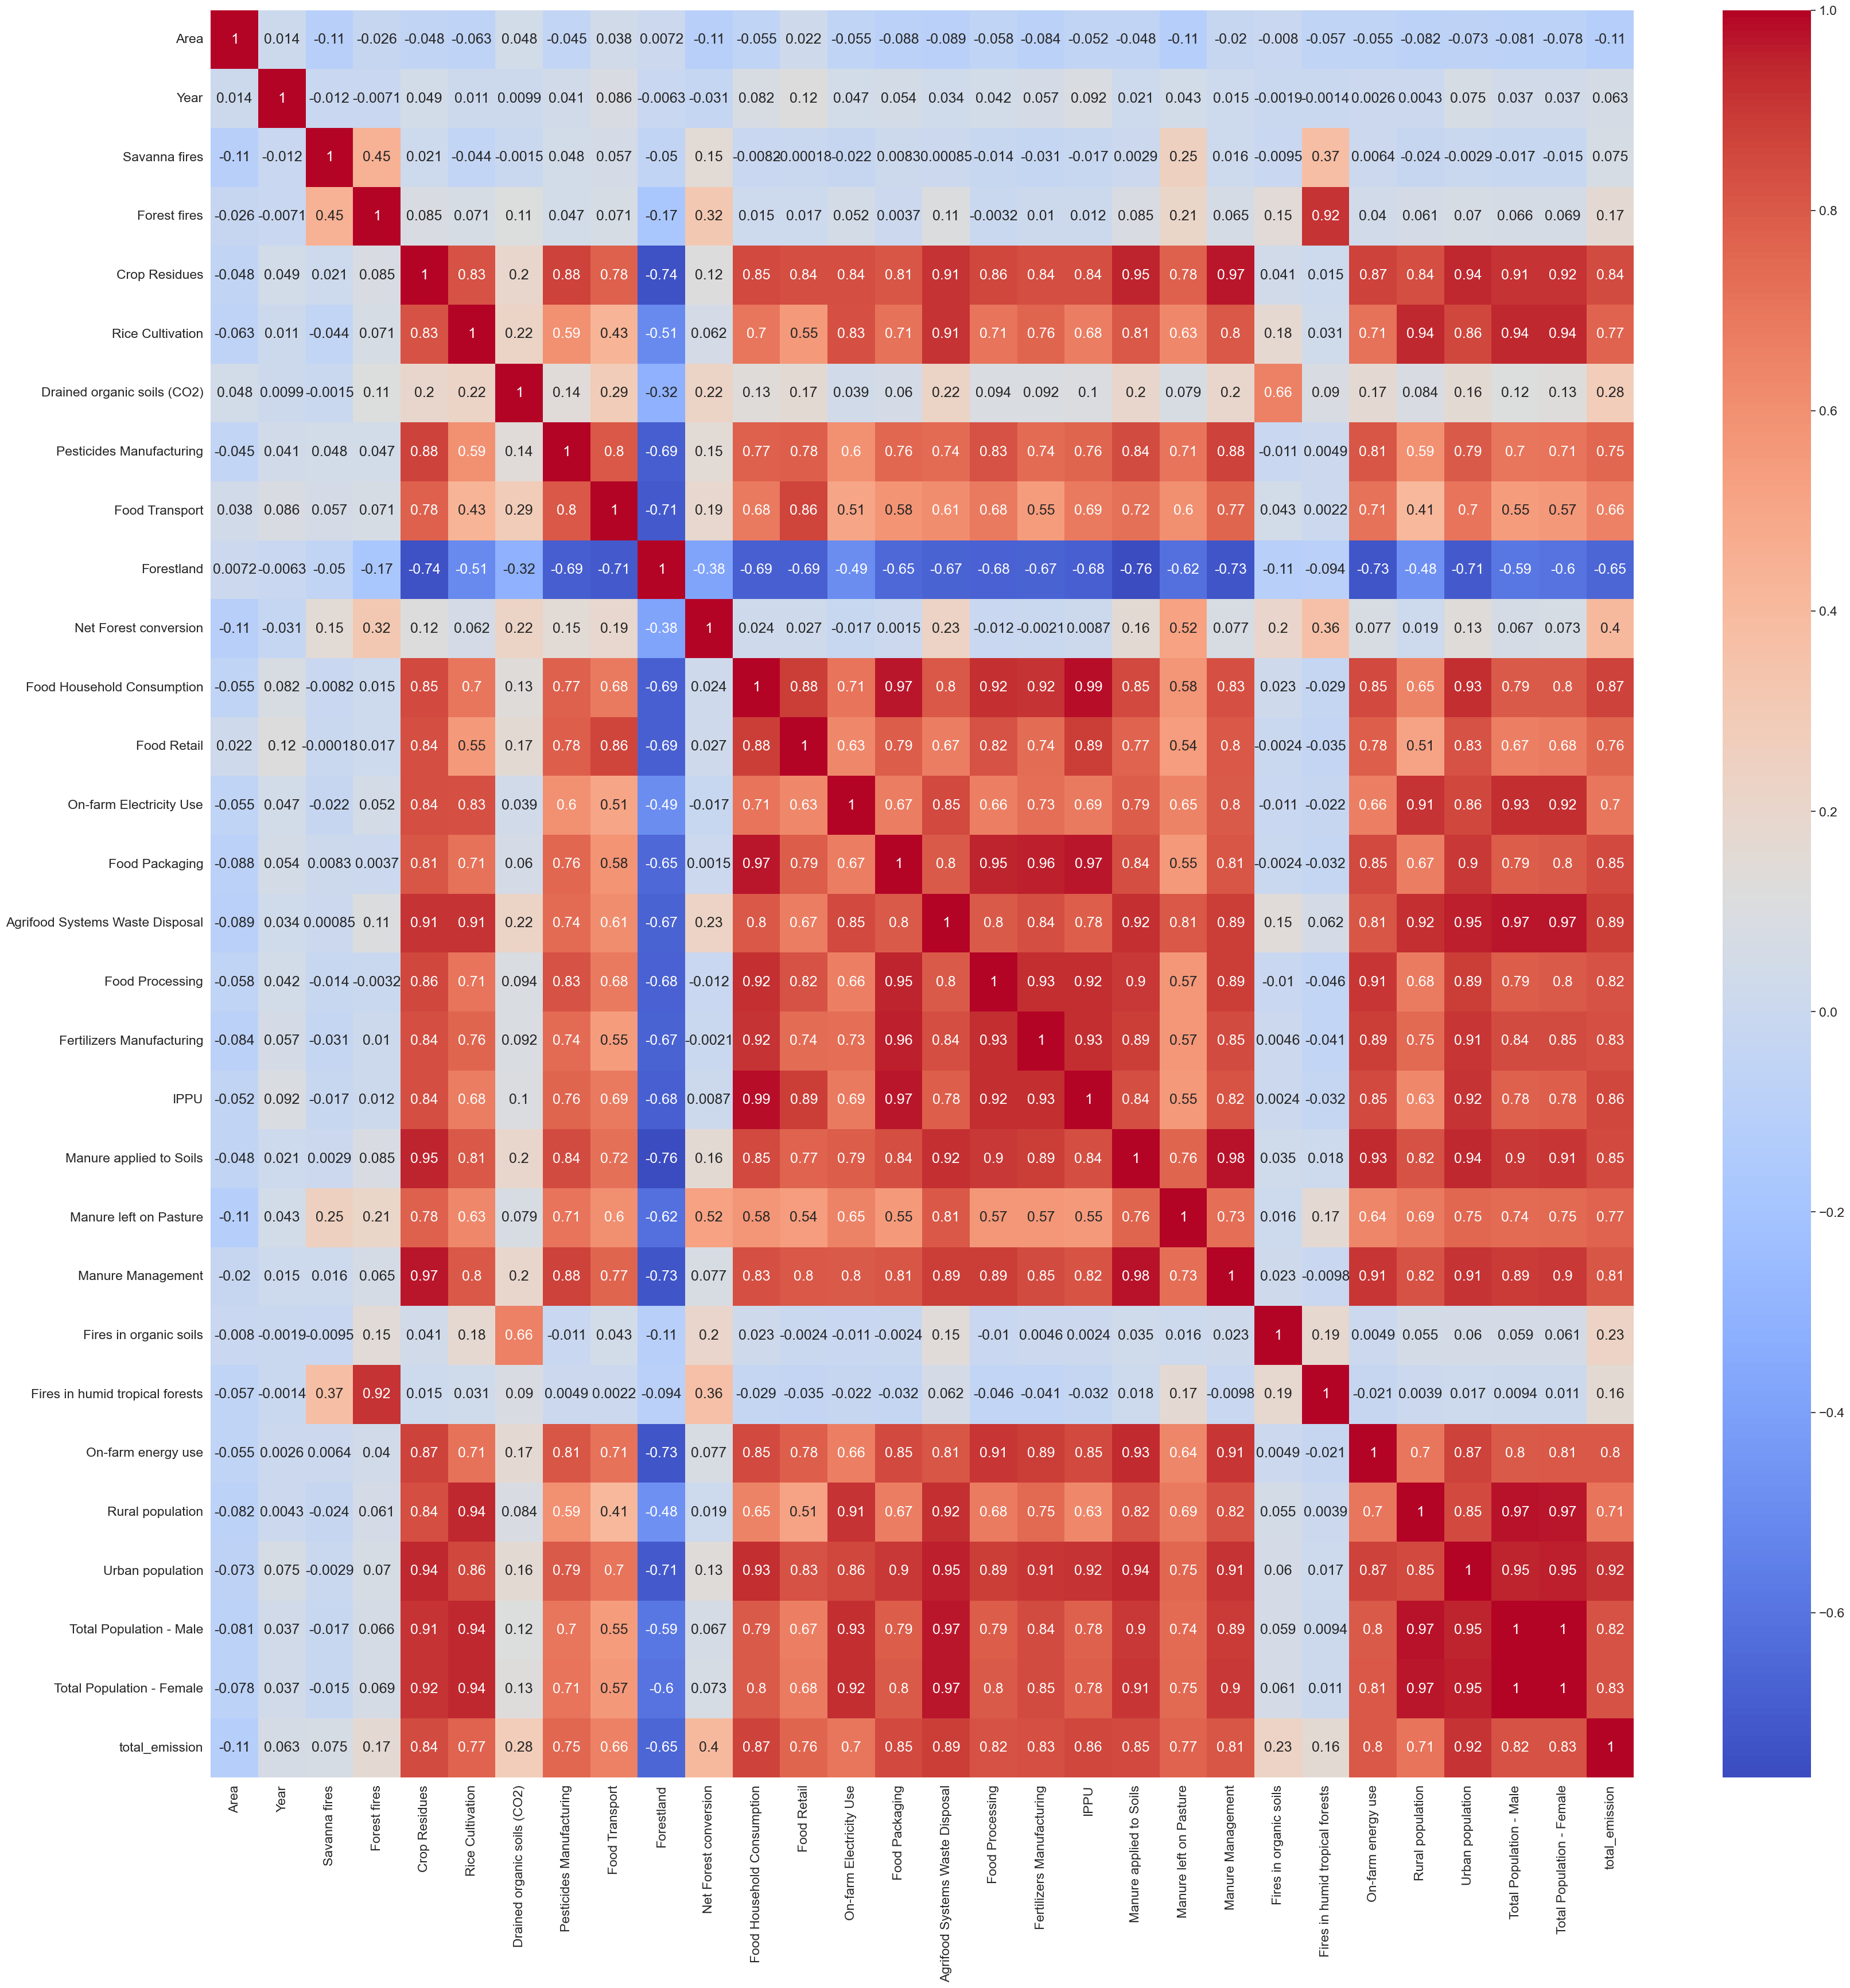

In [43]:
fs.corr_matrix_visual()
plt.show()

#### 8.2 Constant Features Selection

In [44]:
fs.const_features_selection(0.05)

Total Variable Features = 29
Total Constant Features = 0

All features have variance of more than 0.05.


#### 8.3 Filtering Features having strong Correlation with each other

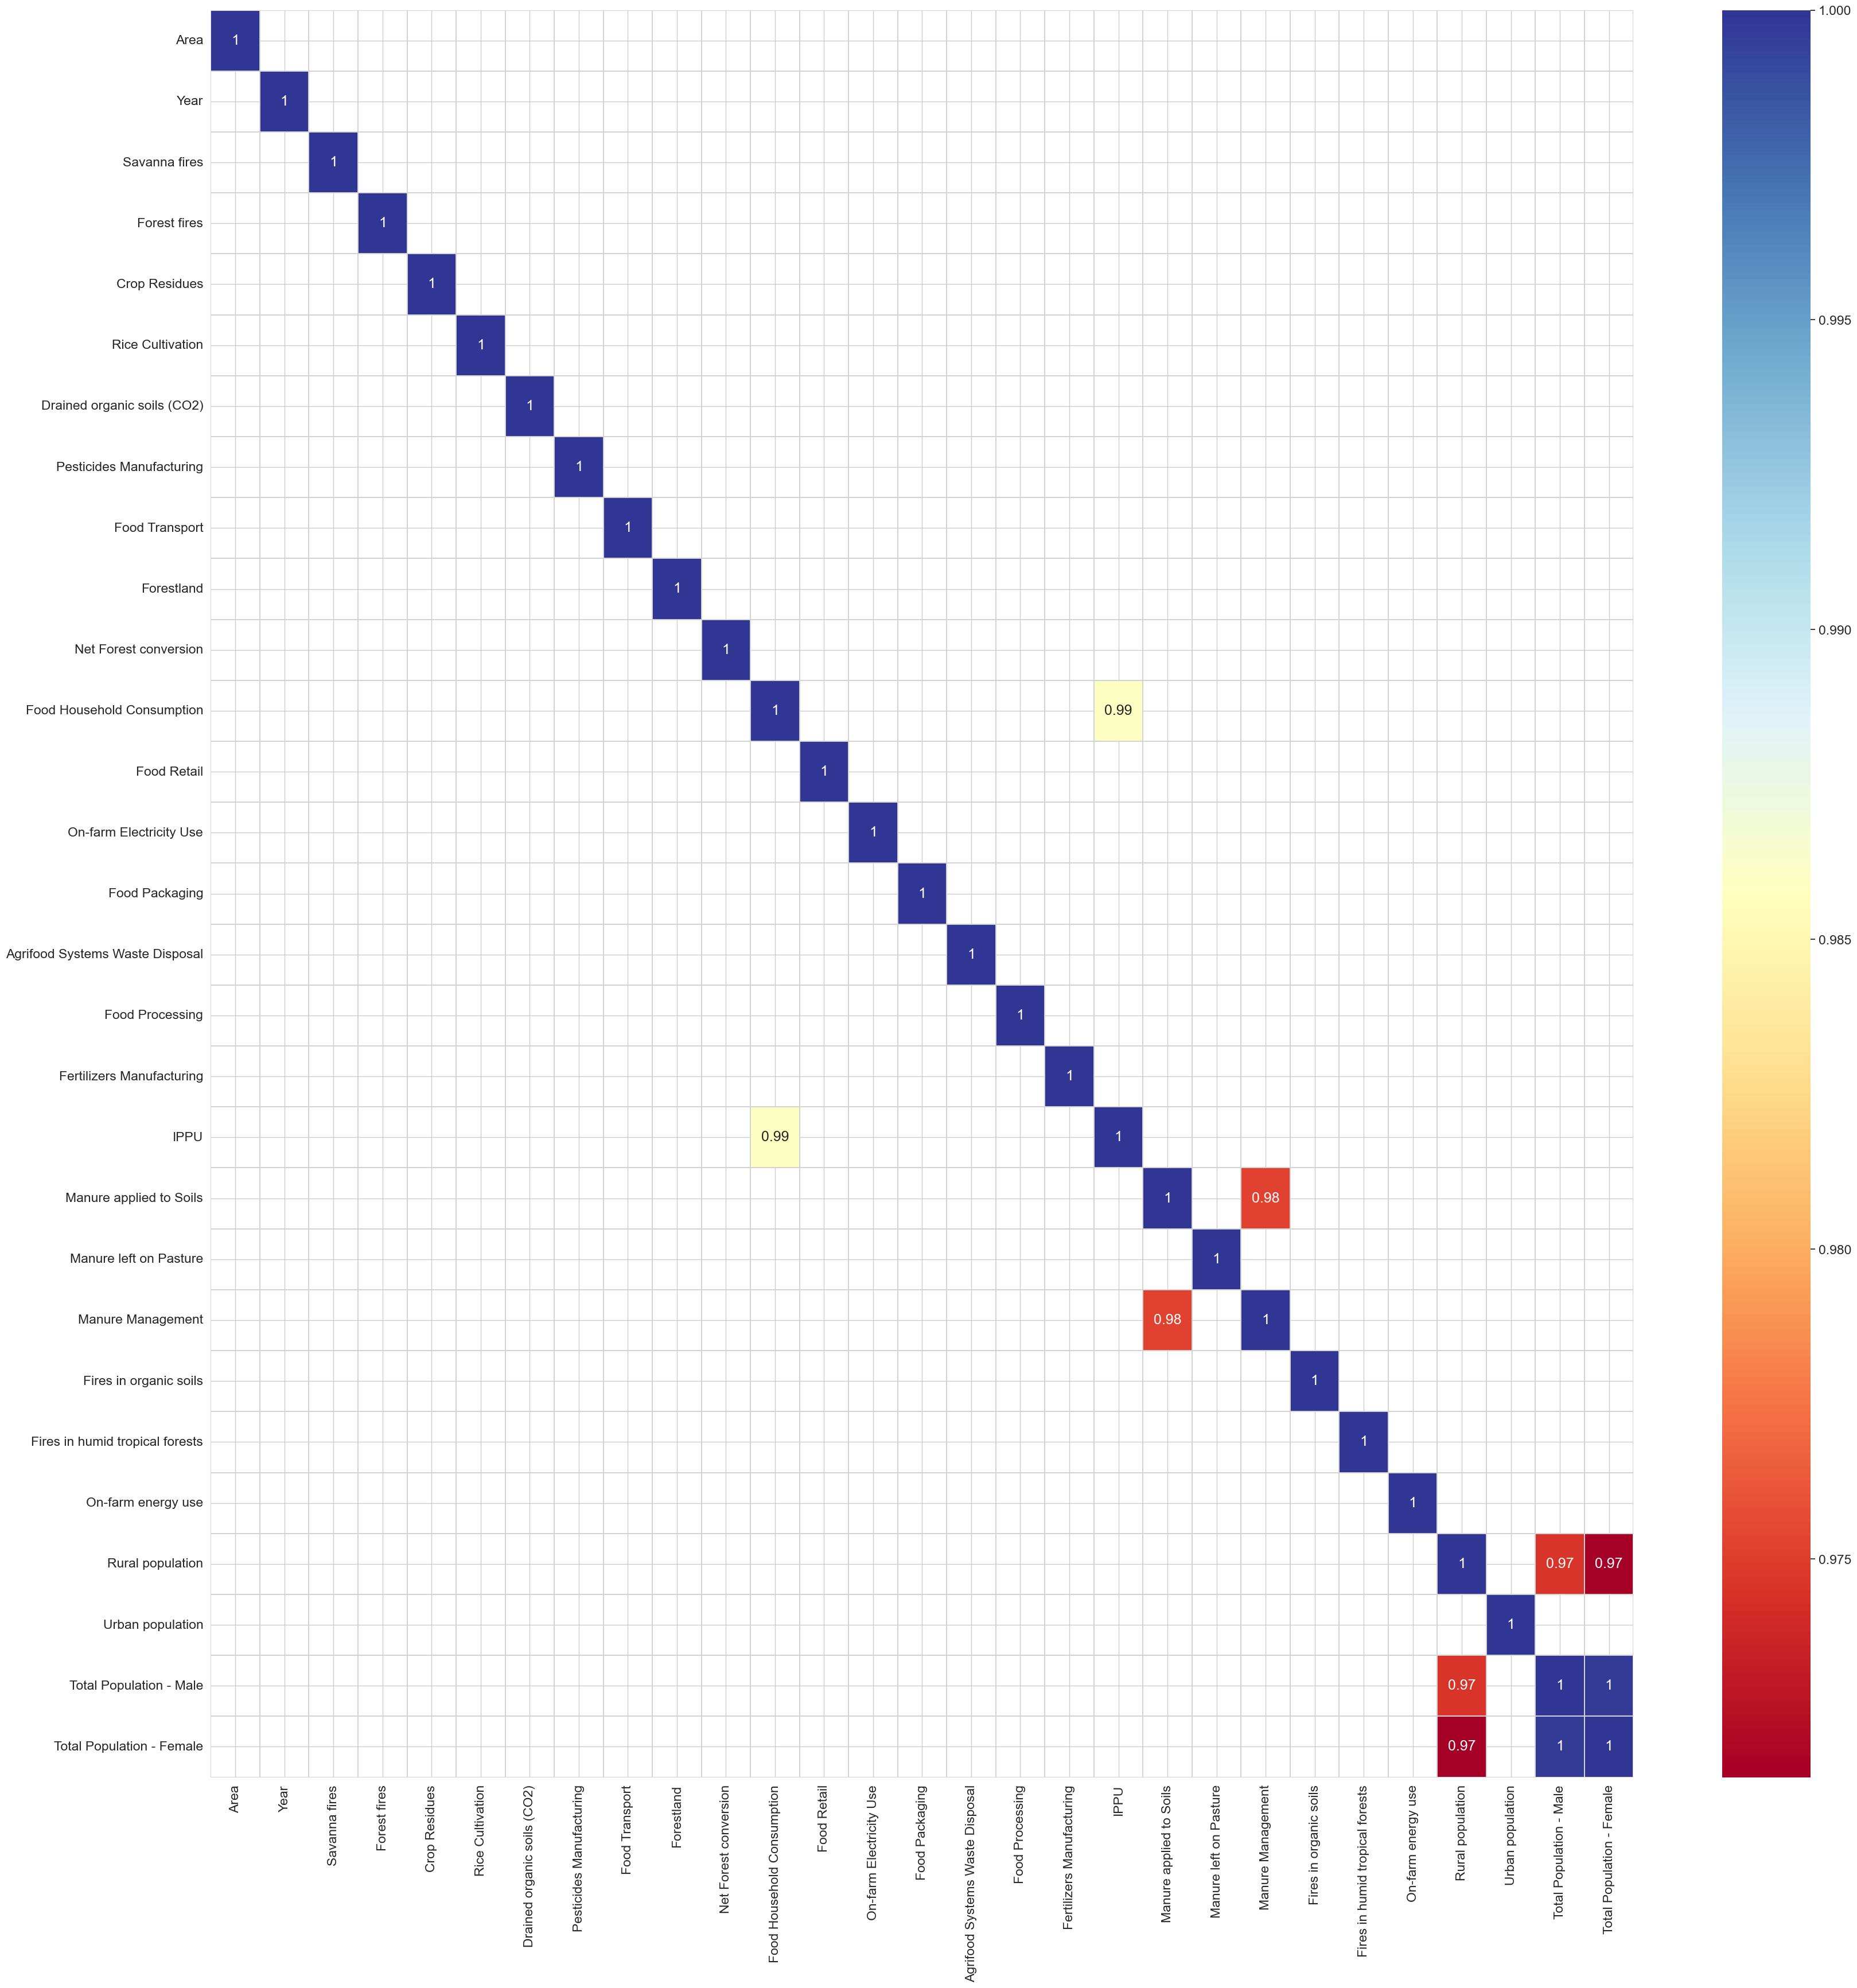

In [45]:
fs.features_corr_visual_filter(0.97)

In [46]:
fs.features_corr_filter(0.97)

{'Total Population - Female', 'Manure Management', 'IPPU', 'Total Population - Male'}
Do you want to drop the features with correlation above threshold 0.97 ? (y/n) y
Features Dropped!


#### 8.4 Filtering Features having less Correlation with Output

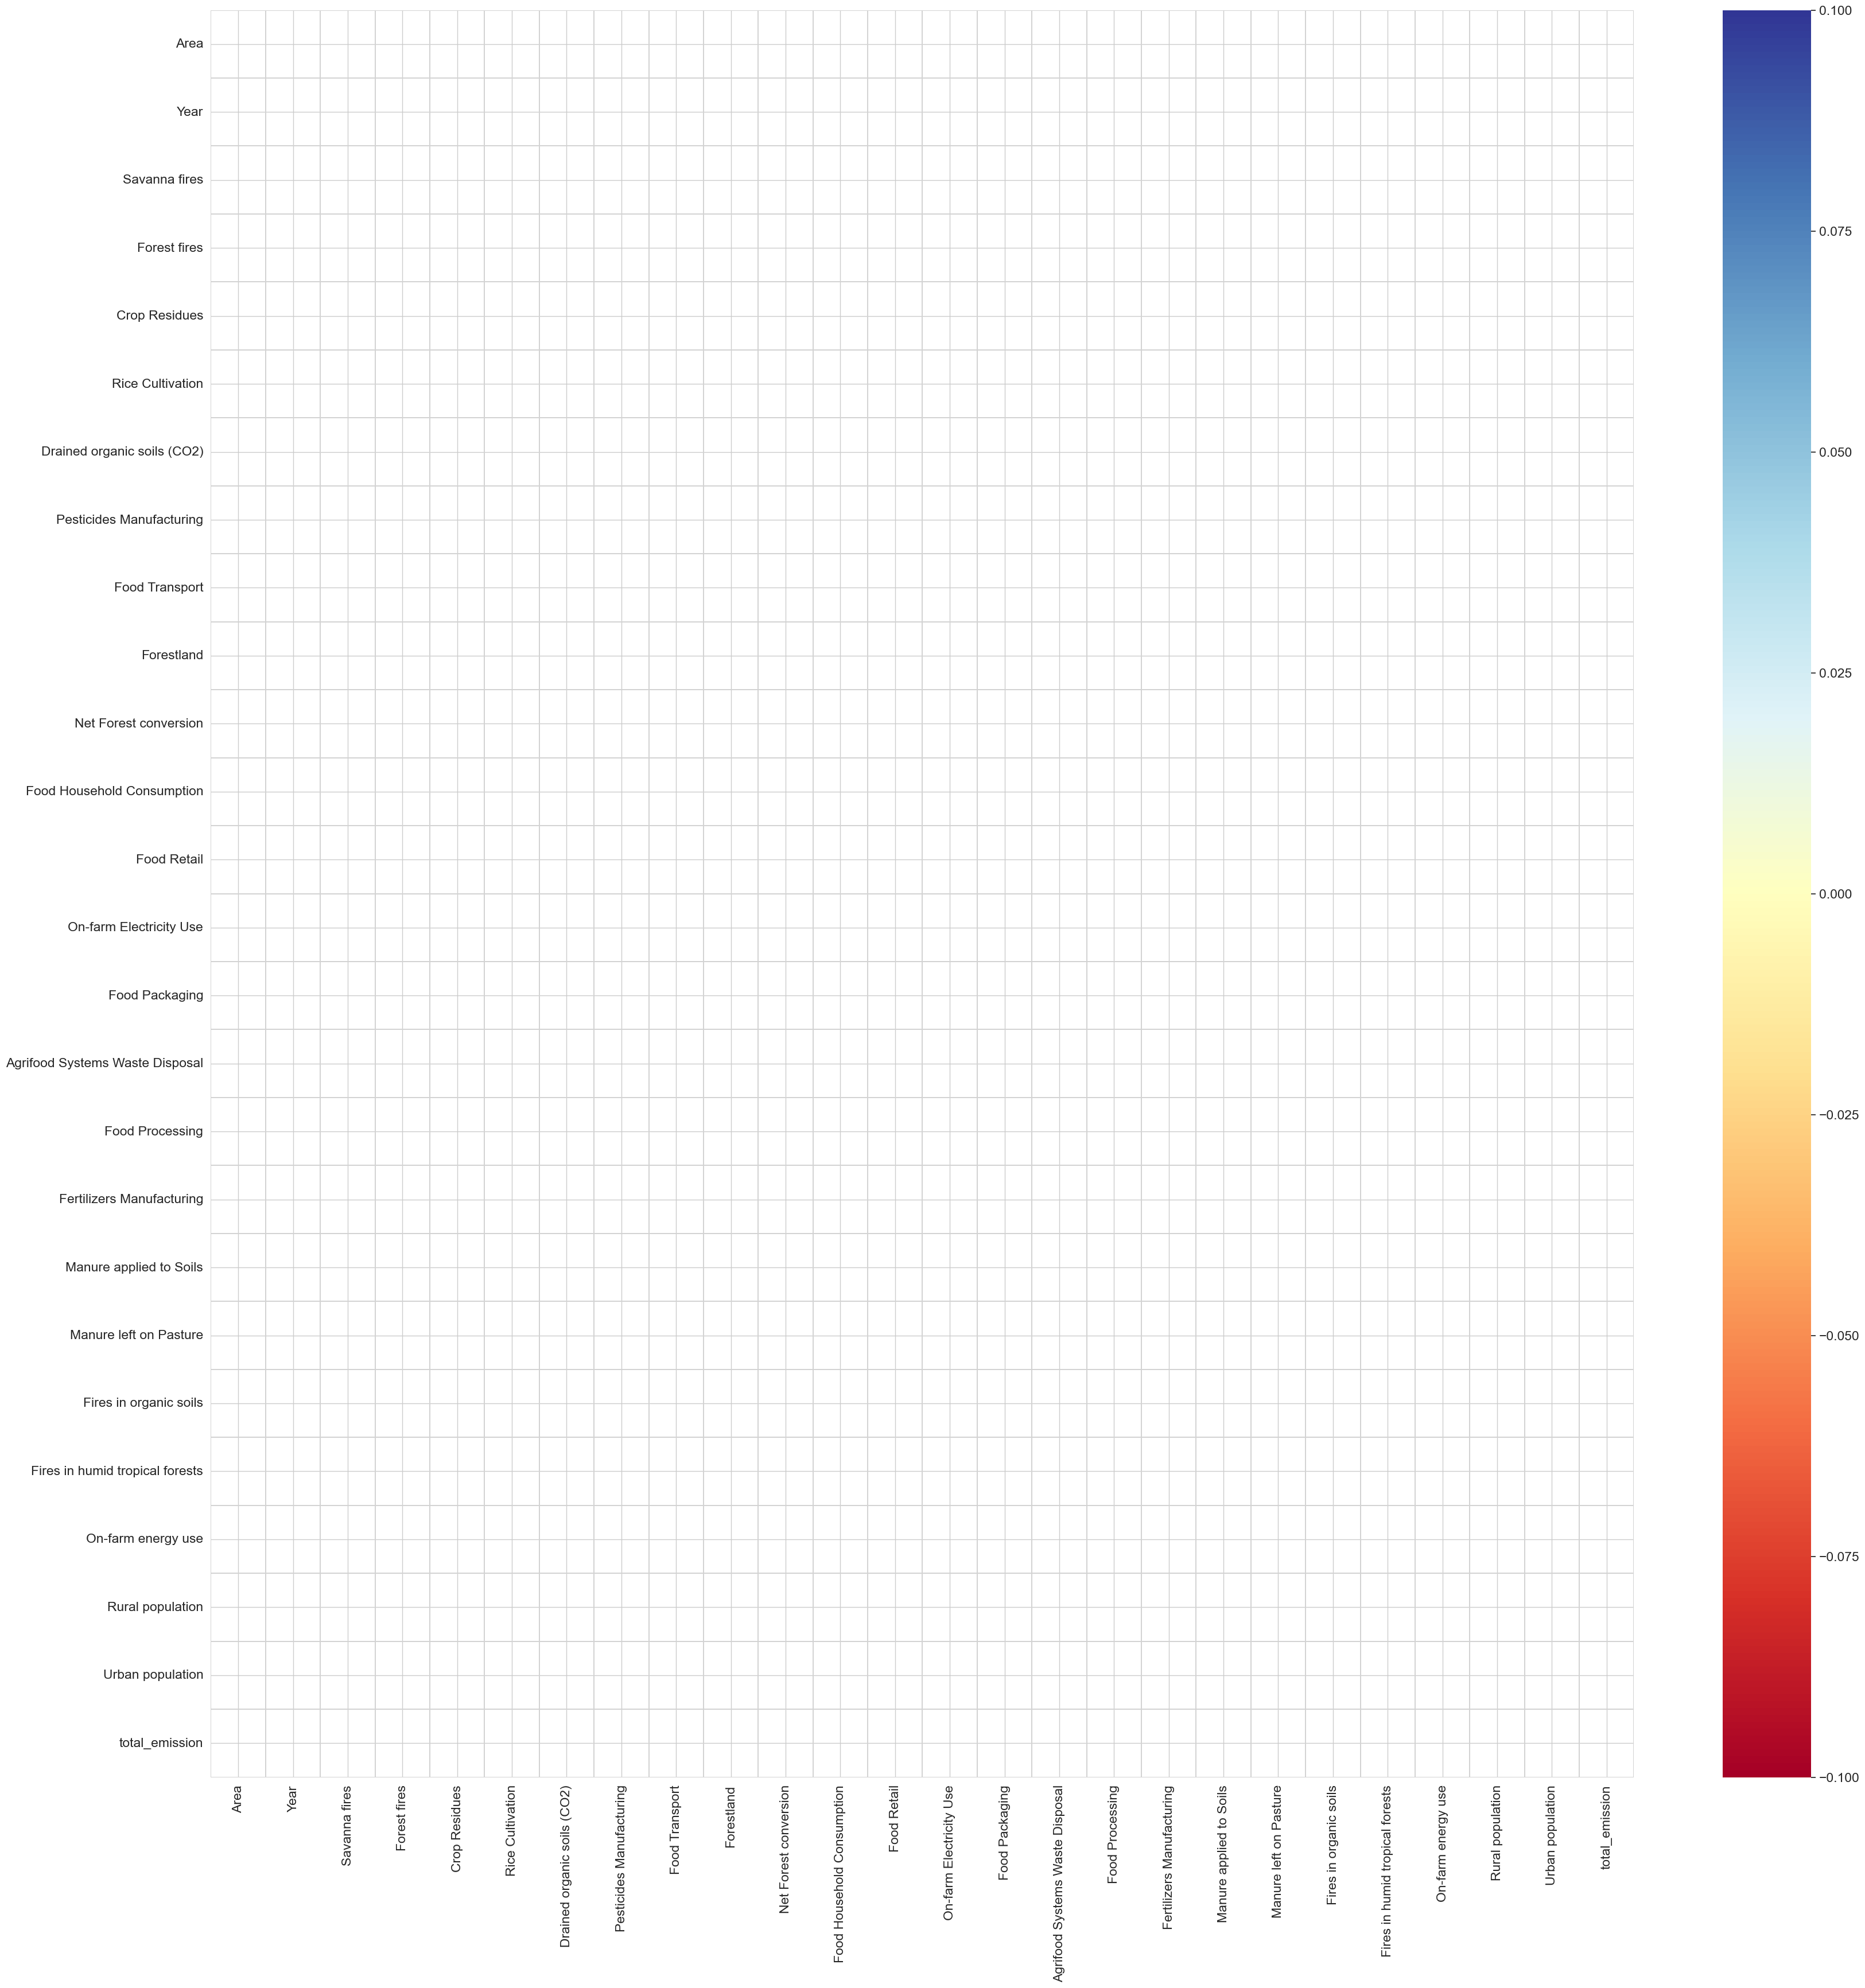

In [47]:
fs.features_corr_with_output_visual_filter(0.0)

In [48]:
fs.features_corr_with_output_filter(0.05)

All features have correlation of more than 0.05 with output.


In [49]:
X.shape

(4227, 25)

In [50]:
# saving selected features
with open('selected_features.json', 'w') as file:
    json.dump(X.columns.tolist(), file)

### 9. Saving Preprocessed Data

In [51]:
preprocessed = pd.concat([X,y],axis =1)

In [52]:
preprocessed.shape

(4227, 26)

In [53]:
preprocessed.head()

,Area,Year,Savanna fires,Forest fires,Crop Residues,Rice Cultivation,Drained organic soils (CO2),Pesticides Manufacturing,Food Transport,Forestland,...,Food Processing,Fertilizers Manufacturing,Manure applied to Soils,Manure left on Pasture,Fires in organic soils,Fires in humid tropical forests,On-farm energy use,Rural population,Urban population,total_emission
0,0.0,0.0,-0.254797,-0.306622,-0.285925,-0.260913,-0.266287,-0.282670,-0.396609,0.265576,...,-0.23004,-0.234906,-0.279588,-0.377470,-0.067985,-0.251936,-0.255666,-0.226930,-0.298854,3475.291240
1,0.0,1.0,-0.254797,-0.306622,-0.292522,-0.261686,-0.266287,-0.282670,-0.396467,0.265576,...,-0.23004,-0.063810,-0.280236,-0.376526,-0.067985,-0.251936,-0.264102,-0.227042,-0.298773,5680.135772
2,0.0,2.0,-0.254797,-0.306622,-0.292884,-0.261882,-0.266287,-0.282670,-0.397534,0.265576,...,-0.23004,-0.063810,-0.282028,-0.376001,-0.067985,-0.251936,-0.266254,-0.227395,-0.298713,5221.131572
3,0.0,3.0,-0.254797,-0.306622,-0.289531,-0.261917,-0.266287,-0.282670,-0.395072,0.265576,...,-0.23004,-0.063810,-0.279018,-0.373688,-0.067985,-0.251936,-0.268689,-0.227833,-0.298730,5316.973272
4,0.0,4.0,-0.254797,-0.306622,-0.289918,-0.261967,-0.266287,-0.282116,-0.392951,0.265576,...,-0.23004,-0.063810,-0.262831,-0.363198,-0.067985,-0.251936,-0.270830,-0.228257,-0.298743,5564.287672


In [54]:
preprocessed.to_csv('preprocessed.csv',index = False)